In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_Xy(num=1, to_numpy=False):
    X = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_X.csv', header=None, sep=' ')
    y = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_y.csv', header=None, sep=' ')[0]
    if to_numpy:
        return X.to_numpy(), y.to_numpy()
    return X, y

def draw_stats(X, y):
    sns.heatmap(X.corr())
    # data = X.copy()
    # data['answers'] = y
    # sns.pairplot(data=data, hue='answers')

def NUM(y_true, y_pred):
    return np.sum([y_pred != y_true])

def ASY_1(y_true, y_pred):
    P = np.array([[-9, 9], [1, 0]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

def ASY_2(y_true, y_pred):
    P = np.array([[-1, 3], [2, -1]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

In [ ]:
X_train, y_train = get_Xy(num=7)

Посмотрим на данные и некоторые их характеристики.

In [ ]:
X_train.shape

(1000, 50)

Посмотрим на дисбаланс классов.


In [ ]:
y_train.mean()

0.132

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,255.371146,-380.191042,35.747932,-138.201481,22.408150,-289.499868,-138.471859,-248.787599,378.837218,-77.788731,...,243.996937,239.036506,510.099226,970.057782,-88.131839,-435.586838,143.932362,200.584269,-228.304259,478.407593
std,9378.828535,13165.683601,5944.574106,10457.283197,10238.543039,12818.496492,4337.598304,6284.756508,9796.121509,8805.686921,...,8993.033963,12471.368298,15013.271477,17722.345047,7809.539956,11320.441204,5109.518014,8736.418442,7657.447996,9753.250251
min,-67483.676130,-391419.142651,-70080.408534,-202286.626490,-207573.039043,-290092.359788,-102502.442219,-90457.579662,-87675.361280,-179165.324267,...,-158913.979653,-231070.809131,-108476.729438,-74624.627849,-209952.458288,-352304.981053,-38718.266242,-90420.063755,-124179.122191,-17781.711751
25%,-0.753925,-0.692063,-0.693770,-0.729835,-0.667684,-0.699220,-0.721348,-0.708896,-0.756996,-0.668552,...,-0.693257,-0.726177,-0.627851,-0.668327,-0.649357,-0.683219,-0.624472,-0.620452,-0.711597,-0.584689
50%,-0.062139,0.008313,-0.066390,-0.005926,-0.027152,0.076220,0.000666,-0.054050,-0.094182,-0.007768,...,-0.021024,0.002571,-0.001500,-0.045263,-0.048881,0.017880,0.064374,0.074645,-0.072131,0.029811
75%,0.664307,0.647023,0.688980,0.639262,0.697044,0.711566,0.684653,0.642566,0.542516,0.616195,...,0.692680,0.713112,0.674705,0.654989,0.605247,0.685148,0.720616,0.733200,0.626487,0.661737
max,254583.090168,107599.253742,156486.171374,71650.851978,241712.417176,105446.606992,72100.661341,120161.397159,270397.012336,179396.162898,...,137075.770962,259708.550863,419336.291838,470908.827901,109748.736787,20442.698983,149549.170462,193225.648191,155072.986399,261209.535040


<Axes: >

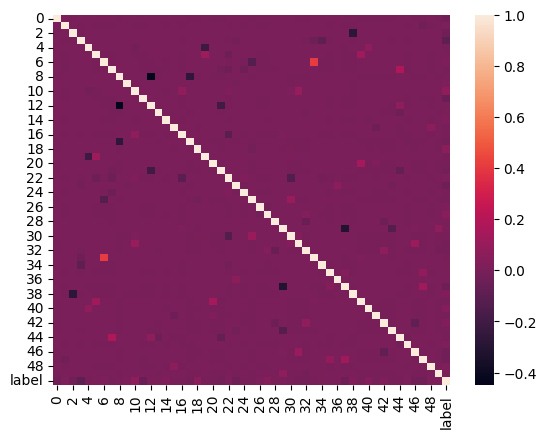

In [ ]:
Xy = X_train.copy()
Xy['label'] = y_train.values.astype('int32')
corr_matrix = Xy.corr()
sns.heatmap(corr_matrix)

In [ ]:
def remove_outliers(X, col, alpha = 0.05):
    thress = (X[col].quantile(alpha), X[col].quantile(1 - alpha))

    # 1st stage
    col_vals = X[col].values
    mask = X[col].apply(lambda x: x < thress[1] and x > thress[0]).values

    #2nd stage
    col_filt_vals = col_vals[mask]

    # print(shapiro(col_filt_vals)[0])
    mu, std = norm.fit(col_filt_vals)
    new_thress = (mu - 5 * std, mu + 5 * std)

    new_mask = X[col].apply(lambda x: x < new_thress[1] and x > new_thress[0]).values
    return X.index.values[new_mask], X.index.values[np.isin(new_mask, [False])]

In [ ]:
KLs = []
pos_ind = np.where(y_train == 1)[0]
neg_ind = np.where(y_train == 0)[0]
orientation = []
non_normal = []

for col in X_train.columns:
    ind, _ = remove_outliers(X_train, col=col, alpha=0.05)
    X_0 = X_train.loc[ind][y_train == 0][col].values
    X_1 = X_train.loc[ind][y_train == 1][col].values
    shapiro_0 = shapiro(X_0)[0]
    shapiro_1 = shapiro(X_1)[0]
    mu_0, std_0 = norm.fit(X_0)
    mu_1, std_1 = norm.fit(X_1)

    KL_div = np.log(std_1 / std_0) + (std_0**2 + (mu_0 - mu_1)**2)/(std_1**2) - 1
    print("KL_div: %.3f, Shapiro_ps: (%.3f, %.3f), N(%.3f, %3f), N(%.3f, %3f), NUM OUT: %d"
          %(KL_div, shapiro_0, shapiro_1, mu_0, std_0, mu_1, std_1, 1000 - len(ind)))
    KLs.append(KL_div)

In [ ]:
top_KL_cols = X_train.columns[np.argsort(np.array(KLs))][::-1][:100]

In [ ]:
pos_ind = np.where(y_train == 1)[0]
neg_ind = np.where(y_train == 0)[0]

for col in X_train.columns:
    ind, ind_neg = remove_outliers(X_train, col=col, alpha=0.05)
    X_train.loc[ind_neg, col] = np.mean(X_train.loc[ind, col].values)
    # X_train.loc[np.intersect1d(ind_neg, neg_ind), col] = np.mean(X_train.loc[np.intersect1d(ind, neg_ind)][col].values)
    # X_train.loc[np.intersect1d(ind_neg, pos_ind), col] = np.mean(X_train.loc[np.intersect1d(ind, pos_ind)][col].values)

<Axes: >

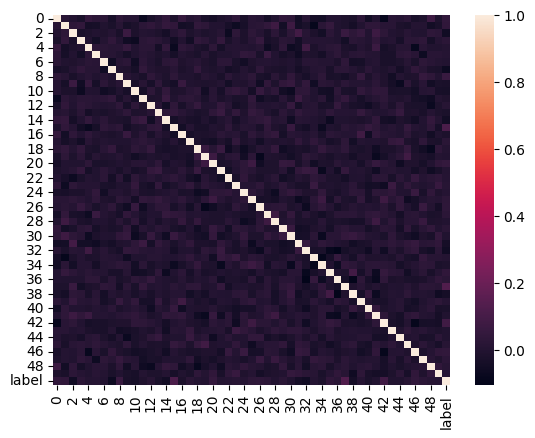

In [ ]:
Xy = X_train.copy()
Xy['label'] = y_train.values.astype('int32')
corr_matrix = Xy.corr()
sns.heatmap(corr_matrix)

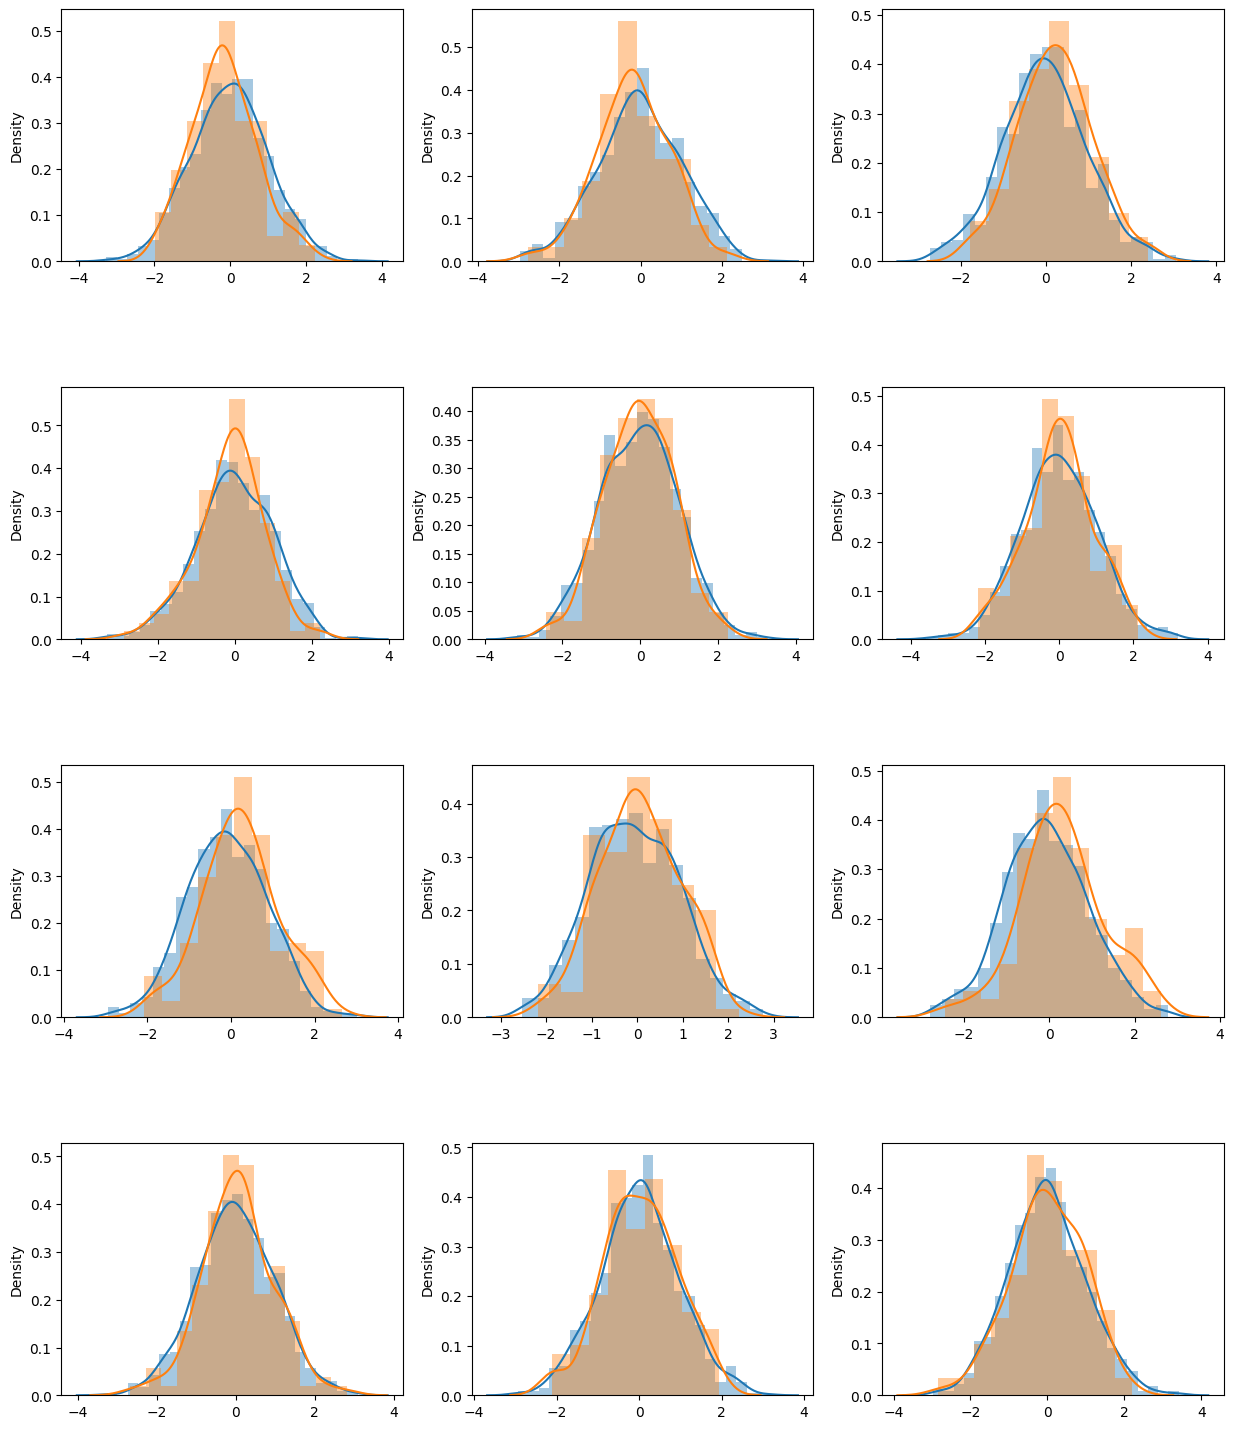

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = trim_axs(axs, len(top_KL_cols[:12]))

for i, col in enumerate(X_train[top_KL_cols[:12]].columns):
    sns.distplot(X_train.loc[y_train==0][col].values, ax=axs[i])
    sns.distplot(X_train.loc[y_train==1][col].values, ax=axs[i])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB

In [ ]:
import tqdm

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
def threshold_func(model, X, y):
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm.tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y.values])
        nums.append(num)

        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)

    loc_min = np.argmin(nums)
    num_thres = thresholds[loc_min]
    axs[0].plot(thresholds, nums, c='C0', lw=1.5, label='NUM, p=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].legend();

    loc_min = np.argmin(acy1s)
    acy1_thres = thresholds[loc_min]
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5, label='ACY1, p=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].legend();

    loc_min = np.argmin(acy2s)
    acy2_thres = thresholds[loc_min]
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5, label='ACY2, p=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].legend();

    return num_thres, acy1_thres, acy2_thres

In [ ]:
model = LogisticRegression()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

9

100%|██████████| 501/501 [00:00<00:00, 715.60it/s]


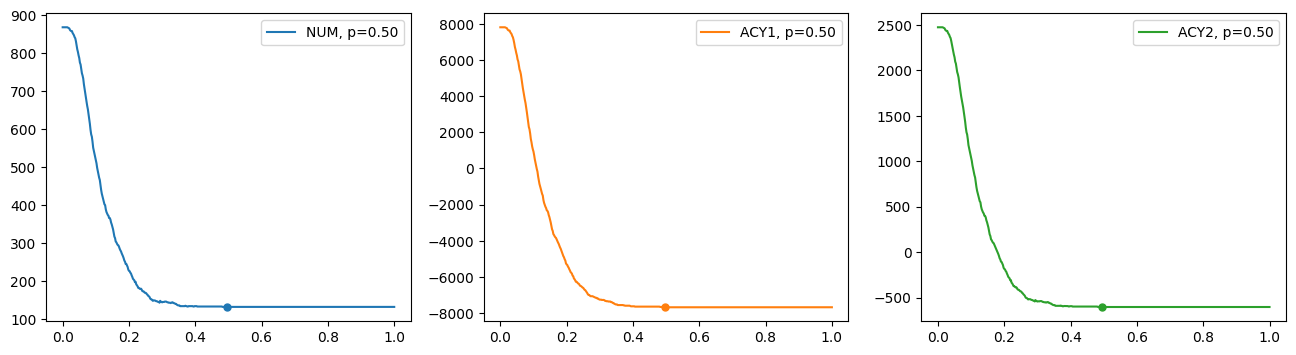

In [ ]:
model = LogisticRegression()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X_train[top_KL_cols[:best_k]], y_train)

In [ ]:
acy1_thres = 1

In [ ]:
def thres_num(clf, X, y):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    return np.sum([y_pred!=y.values])

def thres_roc_auc(clf, X, y):
    y_proba_pred = clf.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba_pred)

def thres_acy1(clf, X, y):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
    return acy1

def thres_acy2(clf, X, y):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
    return acy2

In [ ]:
model = LogisticRegression()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.6395859490836568, 'NUM': 131, 'ASY1': -7680, 'ASY2': -607}


In [ ]:
X = X_train[top_KL_cols[:best_k]]
new_col = X_train[top_KL_cols[best_k:]].sum(axis=1)
X[best_k] = new_col

In [ ]:
model = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

10

100%|██████████| 501/501 [00:00<00:00, 672.96it/s]


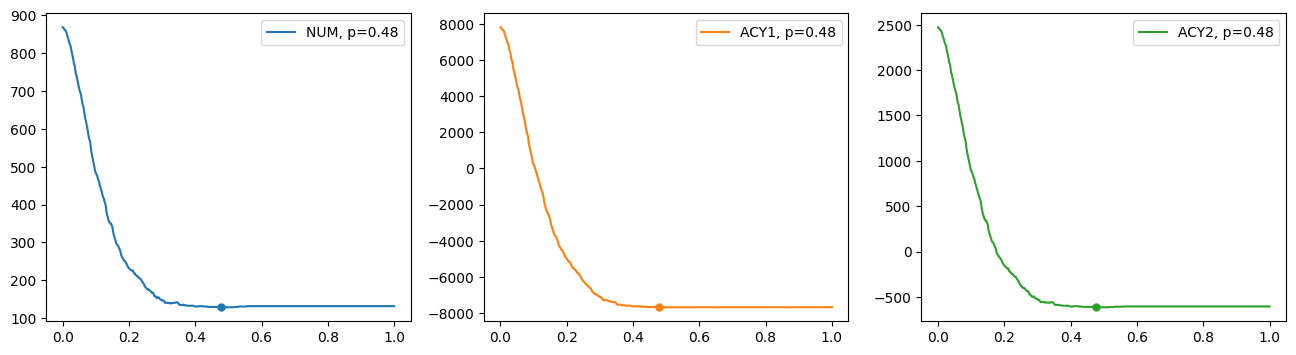

In [ ]:
model = GaussianNB()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X, y_train)

In [ ]:
model = GaussianNB()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X, y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X, y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X, y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X, y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.6478998470726595, 'NUM': 129, 'ASY1': -7683, 'ASY2': -613}


In [ ]:
model = LogisticRegression()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:best_k]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
logreg = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.68501326 0.57029178 0.65384615 0.72147292 0.5465639 ]
Mean roc_auc: 0.635437603316814

Metric: NUM: [26 26 26 27 27]
Sum NUM: 132

Metric: ASY_1: [-1540 -1540 -1540 -1530 -1530]
Sum ASY_1: -7680

Metric: ASY_2: [-122 -122 -122 -119 -119]
Sum ASY_2: -604



In [ ]:
model = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

10

In [ ]:
model = GaussianNB()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:best_k]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
gaussian_nb = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.69341291 0.65030946 0.72656941 0.60565189 0.56411903]
Mean roc_auc: 0.6480125408369378

Metric: NUM: [26 26 26 27 27]
Sum NUM: 132

Metric: ASY_1: [-1540 -1523 -1540 -1530 -1530]
Sum ASY_1: -7663

Metric: ASY_2: [-122 -121 -122 -119 -119]
Sum ASY_2: -603



In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/data/task1_7_test_X.csv", delimiter=' ', header=None)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1182.280865,35.995580,833.386865,6.597275,-327.433397,-83.393495,-133.425115,135.775487,752.978569,-211.186371,...,978.819016,158.117765,-248.519905,-109.620570,-23.069781,-29.385001,-79.219687,116.885895,298.949598,85.585826
std,16997.387895,5332.605129,14788.791979,4041.590643,6858.734633,7465.190161,8281.724480,3942.990724,20484.614667,7850.398022,...,17043.024261,12168.293624,12100.781697,10016.994648,7945.686545,5056.118988,14518.185759,3652.409219,9235.773814,17061.965879
min,-333940.973023,-116932.815573,-50175.431721,-54510.530806,-119102.912829,-129874.448185,-145324.118224,-34962.970619,-140400.076394,-200152.386650,...,-69830.554218,-180113.945534,-192920.346961,-145833.299421,-177008.109110,-108753.324097,-328065.358623,-27274.932306,-131171.037748,-252659.224189
25%,-0.692017,-0.629845,-0.650365,-0.711018,-0.679991,-0.681205,-0.700488,-0.681757,-0.700144,-0.698913,...,-0.625737,-0.648141,-0.654693,-0.679494,-0.690418,-0.675491,-0.735678,-0.714429,-0.656866,-0.659151
50%,0.012353,0.040323,0.032796,-0.018189,-0.003145,-0.012988,0.005130,-0.005945,0.019619,-0.063502,...,-0.057549,0.030346,0.055658,-0.019658,-0.092462,0.032273,-0.000399,-0.036756,0.068134,-0.032152
75%,0.709505,0.762887,0.670510,0.682482,0.661145,0.652703,0.673079,0.668387,0.698767,0.629966,...,0.679288,0.734328,0.697107,0.678824,0.533332,0.765328,0.678803,0.665380,0.690738,0.636025
max,98545.323719,96914.491979,365478.450976,97234.099747,57011.641787,126743.774761,102183.780511,107619.084535,580446.076803,76980.819858,...,463325.396674,300999.917652,179477.166124,137405.780067,106294.613690,82538.533704,317800.948226,83013.897391,225686.714910,407494.739501


In [ ]:
for col in X_test.columns:
    ind, ind_neg = remove_outliers(X_test, col=col, alpha=0.05)
    X_test.loc[ind_neg, col] = np.mean(X_test.loc[ind, col].values)

In [ ]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.021924,0.071513,0.021786,-0.027614,0.007570,0.010658,-0.006185,-0.000940,0.024484,-0.045878,...,-0.008391,0.040393,0.013929,0.011401,-0.082438,0.032196,0.006172,-0.038044,0.039089,-0.026073
std,0.977397,1.007002,1.009437,1.004127,0.984203,0.967420,1.003663,0.990429,0.967069,0.991778,...,0.980942,1.003827,0.962482,1.011441,0.943547,0.998598,1.005584,0.978195,0.986485,0.969891
min,-3.162698,-2.719667,-2.945025,-3.688737,-3.238293,-2.935012,-3.376443,-2.999504,-2.494417,-3.169486,...,-2.775808,-3.194809,-3.440964,-3.109511,-2.823796,-3.239569,-3.164198,-3.351371,-3.055524,-3.671818
25%,-0.650977,-0.621712,-0.638630,-0.705682,-0.669793,-0.658387,-0.682718,-0.676613,-0.696013,-0.683159,...,-0.619929,-0.617706,-0.632443,-0.667623,-0.675304,-0.665512,-0.714103,-0.710888,-0.648996,-0.629885
50%,0.021924,0.043605,0.022941,-0.027092,0.007570,0.003627,-0.005794,-0.004352,0.020369,-0.047146,...,-0.045568,0.040393,0.032077,-0.010534,-0.082438,0.032196,0.006172,-0.038044,0.051072,-0.026073
75%,0.693610,0.755159,0.662393,0.666948,0.653841,0.643989,0.657270,0.647598,0.688609,0.621305,...,0.636803,0.722301,0.659693,0.664181,0.508814,0.735303,0.677543,0.663903,0.670041,0.615229
max,3.260133,3.025542,3.365139,3.096050,3.285102,3.494532,3.036569,3.220816,2.893548,3.352813,...,3.060867,3.093186,2.722864,3.440032,3.192255,2.813063,3.340939,3.225636,3.579205,3.161045


In [ ]:
X = X_test[top_KL_cols[:best_k]]
new_col = X_test[top_KL_cols[best_k:]].sum(axis=1)
X[best_k] = new_col

In [ ]:
def num_predict(clf, X):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def roc_auc_predict(clf, X):
    y_pred = clf.predict(X)
    return y_pred

def acy1_predict(clf, X):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def acy2_predict(clf, X):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

model = GaussianNB()
model = model.fit(X, y_train)
roc_auc = model.predict_proba(X)[:, 1]
num = num_predict(model, X)
acy1 = acy1_predict(model, X)
acy2 = acy2_predict(model, X)

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = roc_auc

out.to_csv("task1_7_ans.csv", index=False, sep=',')

In [ ]:
roc_auc = gaussian_nb.predict_proba(X_test[top_KL_cols[:10]])[:, 1]
num = logreg.predict(X_test[top_KL_cols[:best_k]])
acy1 = logreg.predict(X_test[top_KL_cols[:best_k]])
acy2 = logreg.predict(X_test[top_KL_cols[:best_k]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = gaussian_nb.predict_proba(X_test[top_KL_cols[:10]])[:, 1]

out.to_csv("task1_7_ans.csv", index=False, sep=',')